## Identify businesses to use as data points. 
Create subset df of reviews from HAUs and count by business name to find most reviewed businesses.
Do for all cities at once. Assess relationship between sample and population for each city as well as the total set.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [79]:
reviews = pd.read_csv('../8 - Project 1/Local Files/yelp_review.csv')

In [80]:
elite_users = pd.read_csv('elite_users.csv')

In [81]:
row_users = pd.read_csv('row_users.csv')

In [82]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [83]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [84]:
reviews.describe()

,stars,useful,funny,cool
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03


In [85]:
elite_users.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,# elite years
0,44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,...,0,0,0,9,7,7,7,4,0,1
1,74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,...,2,7,0,16,52,47,47,14,1,7
2,246,i5jSTSpXJtvM-ExWRttglw,Evelina,85,2014-03-17,"aLvxbF2DueKFOqul9eVWCw, JesJ-LaNfr3pKhL7gWhDrw...",51,12,33,13,...,0,0,0,5,16,13,13,14,4,4
3,414,snDjs1hdh7JOWv4jjbXPDw,Michael,447,2008-11-19,"uIjj7EIVBU4kGNgmKPO02A, kroQYWSj-BhIEXT4VwLRHA...",35,36,7,13,...,2,0,0,11,25,22,22,17,3,5
4,544,bBRPy8zUvNc0NGbGmkjrZg,Jan,462,2009-03-30,"T78RIzZ3VPQ9C8njU_VIuA, gxSDEZYcRn_uFWZzQCDKrA...",2166,1853,1681,95,...,151,120,92,221,466,764,764,279,197,4


## Find Elite Reviews

Create subset of reviews that were written by elite users.

In [86]:
elite_reviews = pd.merge(reviews, elite_users[['user_id','# elite years']], on = 'user_id', how = 'inner')

In [87]:
elite_reviews.describe()

,stars,useful,funny,cool,# elite years
count,1.197434e+06,1.197434e+06,1.197434e+06,1.197434e+06,1.197434e+06
mean,3.779641e+00,2.641708e+00,1.248433e+00,1.598071e+00,3.929847e+00
std,1.085145e+00,5.535623e+00,3.912788e+00,3.950631e+00,2.357590e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
50%,4.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,5.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00
max,5.000000e+00,1.608000e+03,9.520000e+02,3.190000e+02,1.300000e+01


In [88]:
print(f"{'{:.2f}'.format(100*len(elite_reviews)/len(reviews))}% of our reviews were written by elite users.")

22.76% of our reviews were written by elite users.


In [89]:
elite_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years
0,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2,6
1,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0,6
2,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,6
3,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0,6
4,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,This is currently my parents new favourite res...,1,0,0,6


In [90]:
len(elite_reviews)

1197434

Group elite reviews by business id to get a count of how many elite reviews each business has.

In [91]:
elite_reviewed_business = pd.DataFrame(elite_reviews.groupby('business_id').agg({'review_id':'count','stars':'mean'}))
elite_reviewed_business = elite_reviewed_business.rename(columns = {'review_id':'# of elite reviews','stars':'average elite stars'})
elite_reviewed_business.sort_values('# of elite reviews', ascending=False)

,# of elite reviews,average elite stars
business_id,,
DkYS3arLOhA8si5uUEmHOw,2239,4.267084
K7lWdNUhCbcnEvI0NhGewg,2185,3.835240
RESDUcs7fIiihp38-d6_6g,2178,4.055556
4JNXUYY8wbaaDmk3BPzlWw,2168,4.091790
FaHADZARwnY4yvlvpnsfGA,2097,3.366237
iCQpiavjjPzJ5_3gPD5Ebg,1625,4.072000
2weQS-RnoOBhb1KsHKyoSQ,1558,3.792683
eoHdUeQDNgQ6WYEnP2aiRw,1427,3.192712
ujHiaprwCQ5ewziu0Vi9rw,1421,3.664321


In [92]:
threshold = 50
print(f"There are {len(elite_reviewed_business[elite_reviewed_business['# of elite reviews'] >= threshold])} businesses that have at least {threshold} elite reviews")

There are 4173 businesses that have at least 50 elite reviews


In [93]:
elite_reviewed_business = elite_reviewed_business[elite_reviewed_business['# of elite reviews'] >= threshold]

Create new data frame of reviews for businesses that have at least 50 reviews by elite members.

In [94]:
elite_reviews = elite_reviews[elite_reviews['business_id'].isin(elite_reviewed_business.index)]
elite_reviews.describe()

,stars,useful,funny,cool,# elite years
count,502414.000000,502414.000000,502414.000000,502414.000000,502414.000000
mean,3.870611,2.585625,1.348780,1.706549,3.994248
std,1.021485,6.440867,4.770303,4.274791,2.403569
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,2.000000
50%,4.000000,1.000000,0.000000,1.000000,3.000000
75%,5.000000,3.000000,1.000000,2.000000,6.000000
max,5.000000,1608.000000,952.000000,319.000000,13.000000


In [95]:
elite_reviews = elite_reviews.reset_index(drop = True)
elite_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years
0,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,6
1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6
2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\n\nI was...,0,0,0,6
3,K7o5jDInfmX3cY5oH6ATNw,u0LXt3Uea_GidxRW1xcsfg,oWTn2IzrprsRkPfULtjZtQ,3,2012-09-23,Came here for a burger as one of my friends sa...,4,0,0,6
4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6


In [96]:
pos = []
neg = []
neu = []
comp = []
for i in range(len(elite_reviews)):
    scores = analyzer.polarity_scores(elite_reviews.iloc[i,5])
    pos.append(scores['pos'])
    neg.append(scores['neg'])
    neu.append(scores['neu'])
    comp.append(scores['compound'])
#analyzer.polarity_scores('best')

In [97]:
len(set(elite_reviews['business_id']))

4173

In [98]:
scores = pd.DataFrame({'Positive':pos, 'Negative':neg, 'Neutral':neu, 'Compound':comp})

In [99]:
elite_reviews_scores = pd.concat([elite_reviews,scores], axis = 1, sort = False)

In [109]:
elite_reviews_scores.to_csv('elite_reviews_scores.csv')

In [100]:
elite_reviews_scores.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound
0,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,6,0.289,0.041,0.671,0.9400
1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6,0.139,0.045,0.817,0.8639
2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\n\nI was...,0,0,0,6,0.190,0.032,0.778,0.9551
3,K7o5jDInfmX3cY5oH6ATNw,u0LXt3Uea_GidxRW1xcsfg,oWTn2IzrprsRkPfULtjZtQ,3,2012-09-23,Came here for a burger as one of my friends sa...,4,0,0,6,0.208,0.048,0.745,0.8529
4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6,0.111,0.096,0.793,0.4985


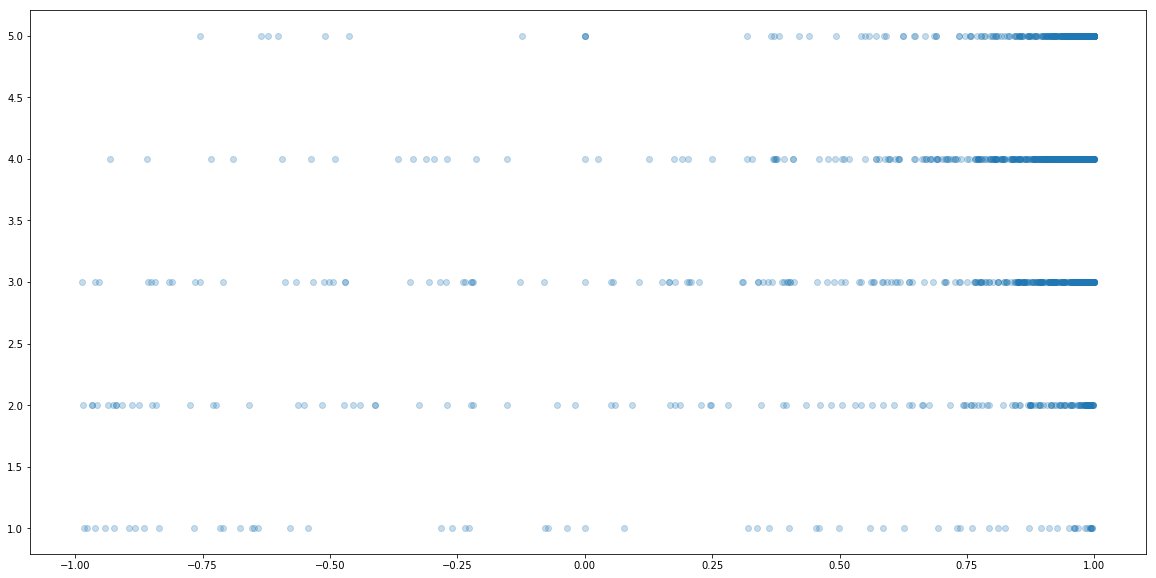

In [115]:
plt.figure(figsize=(20,10))
plt.scatter(elite_reviews_scores['Compound'][0:2000], elite_reviews_scores['stars'][0:2000], alpha = 0.25)
plt.show()

In [ ]:
stars1 = elite_reviews_scores[elite_reviews_scores['stars'] == 1]['Compound']
stars2 = elite_reviews_scores[elite_reviews_scores['stars'] == 2]['Compound']
stars3 = elite_reviews_scores[elite_reviews_scores['stars'] == 3]['Compound']
stars4 = elite_reviews_scores[elite_reviews_scores['stars'] == 4]['Compound']
stars5 = elite_reviews_scores[elite_reviews_scores['stars'] == 5]['Compound']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

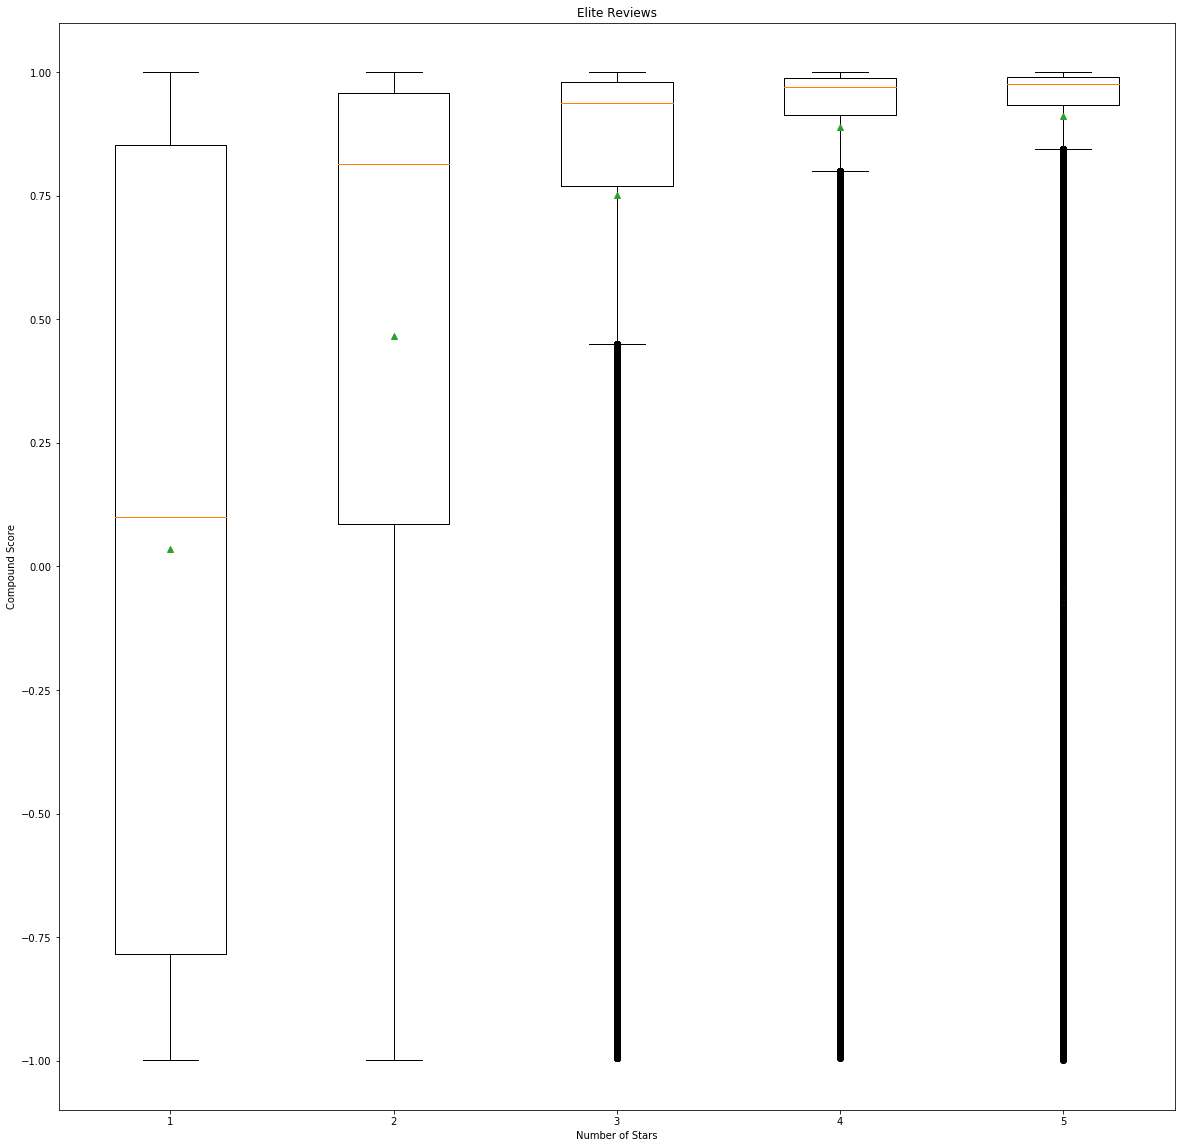

In [125]:
plt.figure(figsize=(20,20))
plt.boxplot(data_by_star, showmeans=True)
plt.title('Elite Reviews')
plt.xlabel('Number of Stars')
plt.ylabel('Compound Score')
plt.savefig('eliteboxplot.png')
plt.show()


Export elite reviews to csv.

In [ ]:
elite_reviews.to_csv('elite_reviews.csv')

In [ ]:
row_users.head()

Create dataframe with reviews that were written only by non-elite users.

In [110]:
row_reviews = pd.merge(reviews, row_users[['user_id','friends']], on = 'user_id', how = 'inner')

Reduce row reviews down to include only elite reviewed businesses.

In [111]:
row_reviews = row_reviews[row_reviews['business_id'].isin(elite_reviewed_business.index)]

In [116]:
row_reviews = row_reviews.reset_index(drop = True)

In [117]:
pos_row = []
neg_row = []
neu_row = []
comp_row = []
for i in range(len(row_reviews)):
    scores = analyzer.polarity_scores(row_reviews.iloc[i,5])
    pos_row.append(scores['pos'])
    neg_row.append(scores['neg'])
    neu_row.append(scores['neu'])
    comp_row.append(scores['compound'])

In [118]:
scores_row = pd.DataFrame({'Positive':pos_row, 'Negative':neg_row, 'Neutral':neu_row, 'Compound':comp_row})

In [120]:
row_reviews_scores = pd.concat([row_reviews,scores_row], axis = 1, sort = False)

In [121]:
row_reviews_scores.to_csv('row_reviews_scores.csv')

In [127]:
row_stars1 = row_reviews_scores[row_reviews_scores['stars'] == 1]['Compound']
row_stars2 = row_reviews_scores[row_reviews_scores['stars'] == 2]['Compound']
row_stars3 = row_reviews_scores[row_reviews_scores['stars'] == 3]['Compound']
row_stars4 = row_reviews_scores[row_reviews_scores['stars'] == 4]['Compound']
row_stars5 = row_reviews_scores[row_reviews_scores['stars'] == 5]['Compound']
row_data_by_star = [row_stars1,row_stars2,row_stars3,row_stars4,row_stars5]

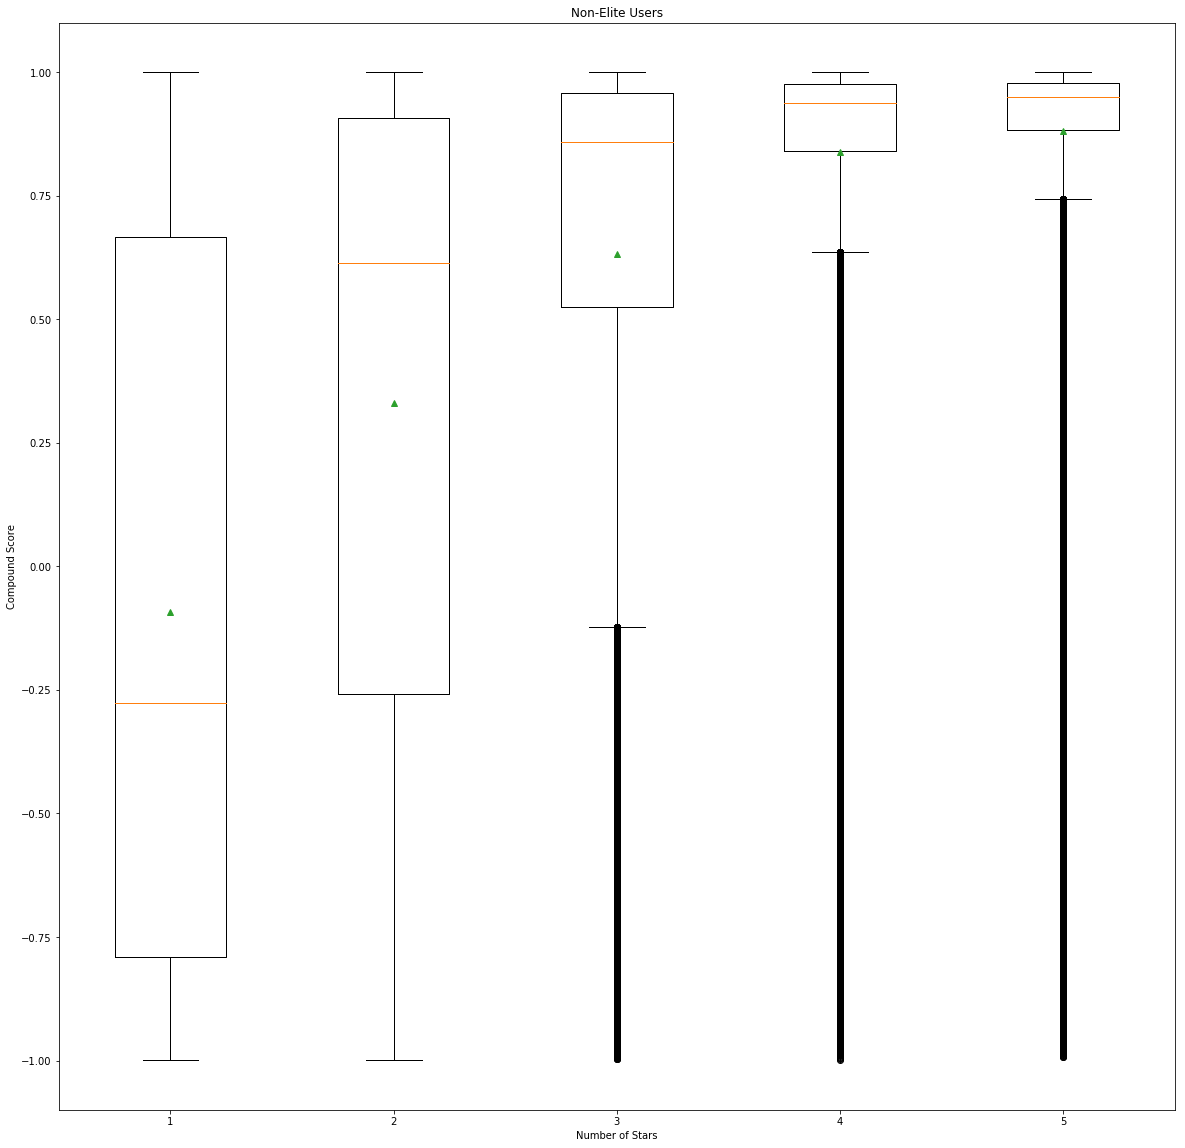

In [128]:
plt.figure(figsize=(20,20))
plt.boxplot(row_data_by_star, showmeans=True)
plt.title('Non-Elite Users')
plt.xlabel('Number of Stars')
plt.ylabel('Compound Score')
plt.savefig('rowboxplot.png')
plt.show()

In [ ]:
row_reviews.describe()

Export row reviews to csv

In [46]:
row_reviews.to_csv('row_reviews.csv')

In [129]:
import scipy.stats as stats

In [130]:
stats.f_oneway(stars1,stars2,stars3,stars4,stars5)

F_onewayResult(statistic=32904.944968903925, pvalue=0.0)

In [133]:
stats.f_oneway(stars4,stars5)

F_onewayResult(statistic=757.0982481887414, pvalue=1.7274831865116672e-166)

In [137]:
stats.ttest_ind(stars4,stars5,equal_var=True)

Ttest_indResult(statistic=-27.51541837204606, pvalue=1.7274831859935625e-166)

{'whiskers': [<matplotlib.lines.Line2D at 0x21093adf208>,
 'caps': [<matplotlib.lines.Line2D at 0x21093adfac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21093adf0b8>,
 'medians': [<matplotlib.lines.Line2D at 0x21093ad0358>,
 'fliers': [],
 'means': []}

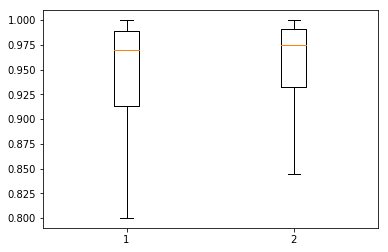

In [136]:
plt.boxplot([stars4,stars5], showfliers=False)

In [131]:
stats.f_oneway(row_stars1,row_stars2,row_stars3,row_stars4,row_stars5)

F_onewayResult(statistic=192982.23788152717, pvalue=0.0)

In [147]:
elite_reviews_scores_45 = elite_reviews_scores[elite_reviews_scores['stars']>=4]
stats.mannwhitneyu(elite_reviews_scores_45['stars'],elite_reviews_scores_45['Compound'], alternative='greater')

MannwhitneyuResult(statistic=123342844804.0, pvalue=0.0)

In [148]:
elite_reviews_scores_45 = elite_reviews_scores[elite_reviews_scores['stars']>=4]
stats.mannwhitneyu(elite_reviews_scores_45['stars'],elite_reviews_scores_45['Compound'], alternative='less')

MannwhitneyuResult(statistic=123342844804.0, pvalue=1.0)

(array([  74.,  145.,  160.,  175.,  183.,  169.,  167.,  158.,  190.,
         189.,  132.,  157.,  143.,  146.,  135.,  118.,  125.,  152.,
         124.,  117.,  138.,  110.,  112.,  126.,  107.,  110.,  100.,
         104.,  100.,   89.,  106.,  100.,   95.,   99.,   72.,  110.,
          85.,   88.,   87.,   98.,   89.,   82.,   83.,   62.,   90.,
          75.,   66.,   98.,   75.,   59.,   88.,   60.,   93.,   66.,
          91.,   62.,   66.,   68.,   51.,   77.,   75.,   80.,   70.,
          70.,   54.,   84.,   43.,   82.,   69.,   61.,   86.,   48.,
          73.,   61.,   72.,   56.,   52.,   78.,   55.,   79.,   58.,
          49.,   71.,   45.,   66.,   54.,   32.,   61.,   43.,   71.,
          45.,   31.,   56.,   27.,   51.,   24.,   32.,   53.,   45.,
         257.,   34.,   41.,   50.,   39.,   19.,   45.,   33.,   72.,
          44.,   43.,   67.,   55.,   61.,   33.,   46.,   80.,   59.,
          65.,   56.,   49.,   83.,   52.,   98.,   64.,   90.,   53.,
      

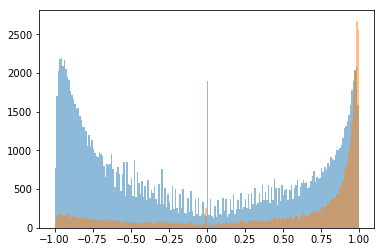

In [144]:
plt.hist(row_stars1, bins = 200, alpha = 0.5)
plt.hist(stars2, bins = 200, alpha = 0.5)

In [150]:
from sklearn.cross_validation import train_test_split

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [151]:
elite_reviews_scores.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound
0,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0,6,0.289,0.041,0.671,0.9400
1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,6,0.139,0.045,0.817,0.8639
2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\n\nI was...,0,0,0,6,0.190,0.032,0.778,0.9551
3,K7o5jDInfmX3cY5oH6ATNw,u0LXt3Uea_GidxRW1xcsfg,oWTn2IzrprsRkPfULtjZtQ,3,2012-09-23,Came here for a burger as one of my friends sa...,4,0,0,6,0.208,0.048,0.745,0.8529
4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1,6,0.111,0.096,0.793,0.4985


In [305]:
X = elite_reviews_scores.iloc[:,10:13].values
y = elite_reviews_scores.iloc[:,3].values

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [263]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm = regressor.fit(X_train, y_train)

In [275]:
y_pred = regressor.predict(X_test)

In [274]:
lm = regressor.fit(X_train, y_train)

In [167]:
from sklearn.metrics import r2_score

In [276]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.22870846290367675

In [279]:
lm.

array([ 5.87369156, -2.33734631,  3.23467759,  0.43902488])

In [282]:
lm.score(X,y)

0.2308455124763199

In [174]:
regressor.fit(X_train, y_train).summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

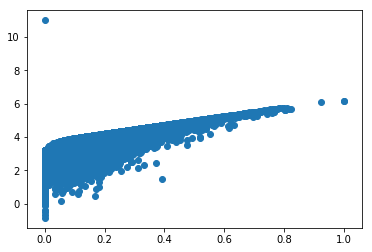

In [194]:
plt.scatter(X_test[:,0],y_pred)

In [215]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [307]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 2.181e+06
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:36:12   Log-Likelihood:            -4.6364e+05
No. Observations:              351689   AIC:                         9.273e+05
Df Residuals:                  351686   BIC:                         9.273e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.8247      0.015    452.780      0.0

In [308]:
ypred = est2.predict(X_test)
r_squared = r2_score(y_test, ypred)
r_squared

0.212943316840138

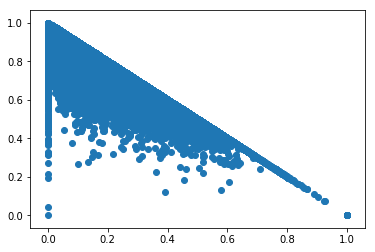

In [225]:
plt.scatter(X[:,0],X[:,2])

In [239]:
from sklearn.cluster import KMeans

In [286]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [287]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [298]:
len(kmeans.labels_)
labels = kmeans.labels_

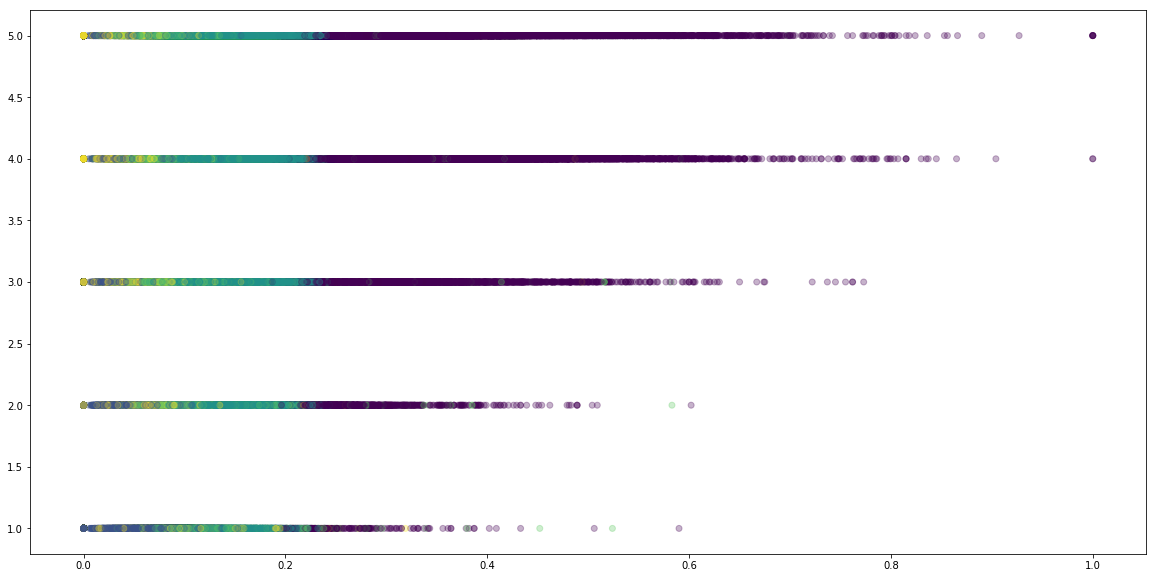

In [311]:
plt.figure(figsize=(20,10))
plt.scatter(X_train[:,0],y_train, c = kmeans.labels_, alpha = 0.3)

In [304]:
X_train[labels == 4,3].mean()

-0.022429309661567722